In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame

from math import sqrt
from numpy import concatenate
from pandas import concat
from numpy import ndarray
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
# dataset indonesia (jakarta)
case = pd.read_csv('data/new/case_maret_july.csv')
case.set_index('date', inplace=True)

In [4]:
case.head()

,case
date,
2020-03-18,38
2020-03-19,50
2020-03-20,14
2020-03-21,44
2020-03-22,36


In [5]:
#split dataset
train = case[:413]
test = case[413:]

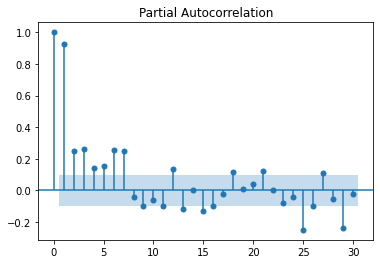

In [7]:
plot_pacf(case, lags=30)
plt.show()

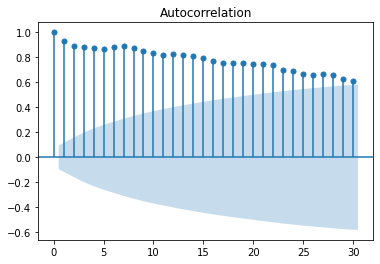

In [9]:
plot_acf(case, lags=30)
plt.show()

In [11]:
model = ARIMA(train, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   case   No. Observations:                  413
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2957.772
Date:                Sat, 18 Sep 2021   AIC                           5923.545
Time:                        12:14:18   BIC                           5939.638
Sample:                    03-18-2020   HQIC                          5929.910
                         - 05-04-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        996.1327    608.219      1.638      0.101    -195.954    2188.220
ar.L1          0.9901      0.006    179.057      0.000       0.979       1.001
ma.L1         -0.6207      0.019    -31.989      0.0

C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [12]:
hasil = model_fit.forecast(10)
hasil= hasil.to_frame()

In [14]:
list_evaluasi = test['case'].tolist()
hasil_arima = hasil['predicted_mean'].tolist()

In [16]:
#mae untuk arima
mae_arima = mean_absolute_error(list_evaluasi, hasil_arima)
mae_arima

117.40108195844778

In [17]:
#mse arima
mse_arima = mean_squared_error(list_evaluasi, hasil_arima)
mse_arima

20804.464865701757

In [18]:
#rmse arima
mse_arima = mean_squared_error(list_evaluasi, hasil_arima, squared= False)
mse_arima

144.23752932472794